# Question2:  predict the probability of Heart Disease 
## Fabio Carrasco

#### In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:

In [90]:
import pandas as pd

In [91]:
heart_df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

#### Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [92]:
from sklearn.preprocessing import scale

In [93]:
heart_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


In [94]:
X = scale(heart_df.loc[:, heart_df.columns != 'AHD'])
y = heart_df['AHD']

print(X)
print(y.head())

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ...
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]
0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object


#### Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

#### Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [98]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [99]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label="Yes")

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [100]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7650406504065042


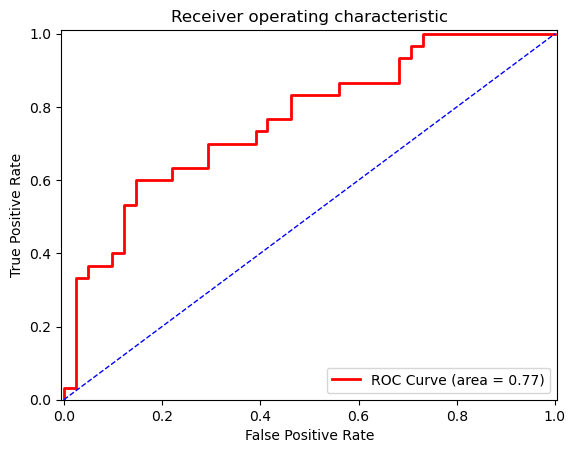

In [101]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### The accuracy using probabilty is 77%